<a href="https://colab.research.google.com/github/amandafadilaerros/MachineLearning_2024/blob/main/Tugas_CNN_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Buatlah model CNN berdasarkan dataset citra LFW.

Langkah 1 - Impor Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


Langkah 2 - Muat Dataset

In [2]:
# Load dataset LFW
lfw_dataset = fetch_lfw_people(min_faces_per_person=50, resize=0.4)
images = lfw_dataset.images
labels = lfw_dataset.target
label_names = lfw_dataset.target_names

print(f"Shape of images: {images.shape}")  # (n_samples, height, width)
print(f"Number of classes: {len(label_names)}")


Shape of images: (1560, 50, 37)
Number of classes: 12


Langkah 3 - Visualisasi Data

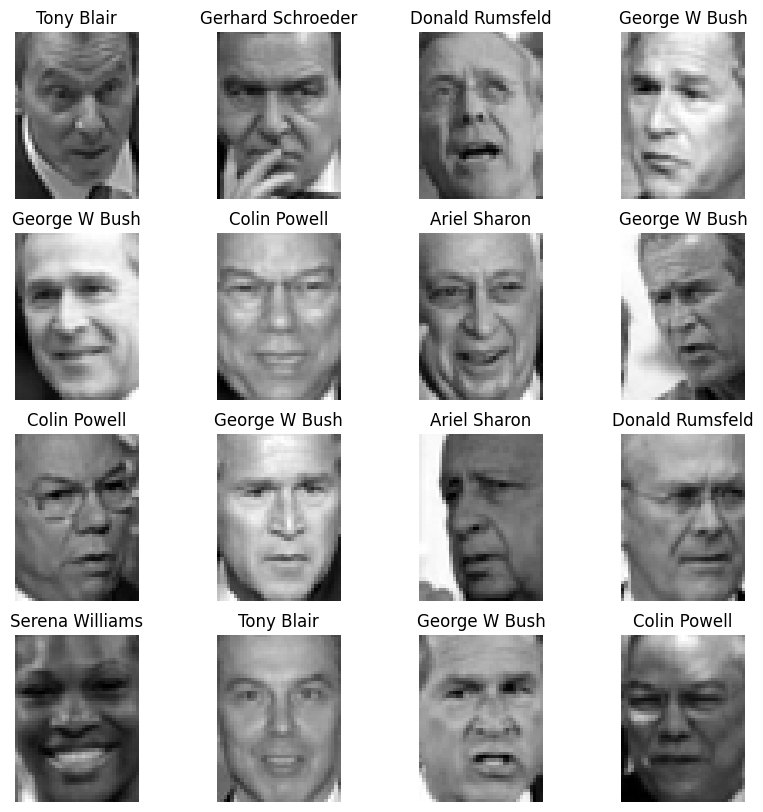

In [3]:
# Tampilkan beberapa contoh gambar
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i], cmap="gray")
    plt.title(label_names[labels[i]])
    plt.axis("off")
plt.show()


Langkah 4 - Pra-Pemrosesan Data

In [4]:
# Normalisasi dan tambahkan dimensi channel
images = images / 255.0  # Normalisasi ke [0, 1]
images = np.expand_dims(images, axis=-1)  # Tambahkan channel (grayscale -> 1 channel)

# One-hot encoding label
labels_one_hot = to_categorical(labels, num_classes=len(label_names))

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(images, labels_one_hot, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (1248, 50, 37, 1)
Test set shape: (312, 50, 37, 1)


Langkah 5 - Bangun Model CNN

In [5]:
model = Sequential()

# Layer konvolusi pertama
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)))
model.add(MaxPooling2D((2, 2)))

# Layer konvolusi kedua
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Layer konvolusi ketiga
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Regularisasi
model.add(Dense(len(label_names), activation='softmax'))  # Output sesuai jumlah kelas

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 35, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 17, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 22, 15, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 11, 7, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 9, 5, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │           1,548 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,420 (880.55 KB)

 Trainable params: 225,420 (880.55 KB)

 Non-trainable params: 0 (0.00 B)

Langkah 6 - Latih Model

In [6]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 137ms/step - accuracy: 0.3043 - loss: 2.3935 - val_accuracy: 0.3440 - val_loss: 2.2144
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 0.3401 - loss: 2.2064 - val_accuracy: 0.3440 - val_loss: 2.1629
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.3243 - loss: 2.1667 - val_accuracy: 0.3440 - val_loss: 2.1551
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.3498 - loss: 2.1554 - val_accuracy: 0.3440 - val_loss: 2.1583
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.3363 - loss: 2.1856 - val_accuracy: 0.3440 - val_loss: 2.1728
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.3472 - loss: 2.1490 - val_accuracy: 0.3440 - val_loss: 2.1732
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.3556 - loss: 2.1338 - val_accuracy: 0.3440 - val_loss: 2.1584
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.3383 - loss: 2.1477 - val_accuracy: 0.3440 -

Langkah 7 - Evaluasi Model

10/10 - 0s - 34ms/step - accuracy: 0.3429 - loss: 2.0818
Test Accuracy: 34.29%


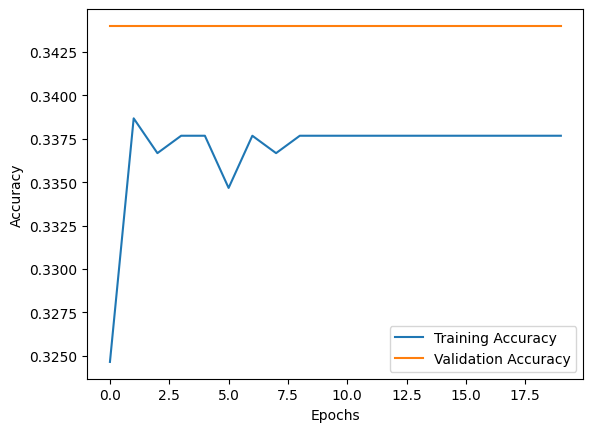

In [7]:
# Evaluasi pada data testing
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Visualisasi akurasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Langkah 8 - Prediksi

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Actual: George W Bush, Predicted: George W Bush


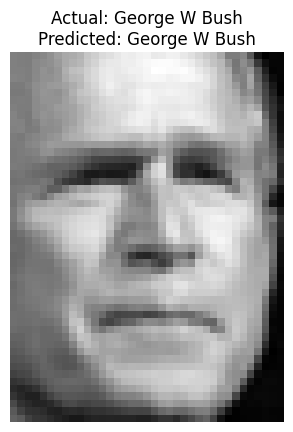

In [8]:
# Ambil satu gambar dari test set
sample_image = X_test[0]
sample_label = np.argmax(y_test[0])

# Prediksi
prediction = np.argmax(model.predict(np.expand_dims(sample_image, axis=0)))
print(f"Actual: {label_names[sample_label]}, Predicted: {label_names[prediction]}")

# Tampilkan gambar
plt.imshow(sample_image.squeeze(), cmap='gray')
plt.title(f"Actual: {label_names[sample_label]}\nPredicted: {label_names[prediction]}")
plt.axis('off')
plt.show()
